In [1]:
%matplotlib inline

/Users/mabucchi/com.github/pybalu/examples


In [2]:
from scipy.io import loadmat

# load a dataset with 810 samples and 294 features
data = loadmat("feature_selection/realdata")
features = data["features"]
classes = data["classes"].squeeze()


In [3]:
from pybalu.data_selection import stratify
from pybalu.feature_transformation import normalize

# Training and Testing data (90% training, 10% testing)
idx_train, idx_test = stratify(classes, .90)
f_train = features[idx_train]
c_train = classes[idx_train]
f_test = features[idx_test]
c_test = classes[idx_test]

f_train_norm, a, b = normalize(f_train)
f_test_norm = f_test * a + b


In [4]:
from pybalu.feature_selection import sfs

N_FEATURES = 15

selected_feats = sfs(f_train_norm, c_train, n_features=N_FEATURES,
                     method="fisher", show=True)



Selecting Features: 100%|██████████| 15.0/15.0 [00:01<00:00, 7.57 features/s]


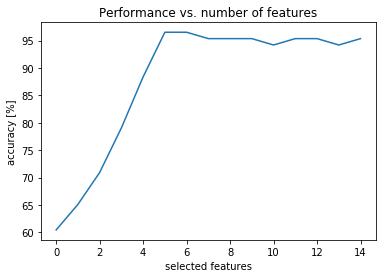

In [7]:
from pybalu.classification import structure
from pybalu.performance_eval import performance
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def performance_for_features(feat_idxs):
    # train classifier
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(f_train_norm[:, feat_idxs], c_train)

    # predict and evaluate performance
    prediction = knn.predict(f_test_norm[:, feat_idxs])
    return performance(prediction, c_test)


values = [performance_for_features(selected_feats[:i]) * 100
          for i in range(1, N_FEATURES + 1)]

plt.plot(values)
plt.title("Performance vs. number of features")
plt.xlabel('selected features')
plt.ylabel('accuracy [%]')
plt.show()
